In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import warnings
import random
from pympler import asizeof

In [7]:
warnings.filterwarnings(action = 'ignore')
random.seed(0)

<h1>Part 1</h1>

32.2 The Kabin-Karp Algorithm

In [8]:
def rabinkarp_search(text, pattern, q):
    pattern_len = len(pattern)
    text_len = len(text)
    iterations = 0
    index_list = []
    d = 256
    p = 0
    t = 0
    h = 1
    i = 0
    j = 0
    
    for i in range(pattern_len-1):
        h = (h*d) % q
    
    for i in range(pattern_len):
        p = (d*p + ord(pattern[i])) % q
        t = (d*t + ord(text[i])) % q
    
    for i in range(text_len-pattern_len+1):
        iterations += 1
        
        if p == t:
            for j in range(pattern_len):
                if text[i+j] != pattern[j]:
                    break
            
            j += 1
            if j == pattern_len:
                index_list.append(i)
        
        if i < text_len-pattern_len:
            t = (d*(t - ord(text[i])*h) + ord(text[i+pattern_len])) % q
            
            if t < 0:
                t = t + q
    return index_list, iterations

In [2]:
#Checking

pattern='abc'
text='abcabeabdabc'

index_list, iterations = rabinkarp_search(
    pattern=pattern,
    text=text,
    q=101
)

print('Number of Iterations:', iterations)
print('Index List:', index_list)

Number of Iterations: 10
Index List: [0, 9]


32.4 The Knuth-Mottir-Pratt algorithm.


In [3]:
def return_prefix(pattern):
    pattern_len = len(pattern)
    prefix = [0]*pattern_len
    i = 0
    j = 1
    
    while j < pattern_len:
        if pattern[i] == pattern[j]:
            prefix[j] = i + 1
            i += 1
            j += 1
        
        elif i:
            i = prefix[i - 1]
        
        else:
            prefix[j] = 0
            j += 1
    return prefix

def kmp_search(text, pattern):
    pattern_len = len(pattern)
    text_len = len(text)
    prefix = return_prefix(pattern)
    iterations = 0
    index_list = []
    i = 0
    j = 0
    
    while i < text_len and j < pattern_len:
        iterations += 1
        if text[i] == pattern[j]:
            if j == pattern_len - 1:
                index_list.append(i - pattern_len + 1)
                j = 0
            
            else:
                j += 1
            
            i += 1
        elif j:
            j = prefix[j-1]
        
        else:
            i += 1
    return index_list, iterations

In [4]:
pattern='abc'
text='abcabeabdabc'

index_list, iterations = kmp_search(
    pattern=pattern,
    text=text
)

print('Number of Iterations:', iterations)
print('Index List:', index_list)

Number of Iterations: 14
Index List: [0, 9]


In [9]:
df = pd.DataFrame()
pattern='abc'
letters = 'abcde'
index = 0

for i in range(10, 1000, 10):
    text = ''.join(random.choice(letters) for j in range(i))
    df.loc[index, 'rabinkarp_time'] = timeit.timeit(
        'rabinkarp_search(text, pattern, 101)',
        setup='from __main__ import rabinkarp_search, pattern, text',
        number=3)
    
    df.loc[index, 'rabinkarp_memory'] = asizeof.asizeof(rabinkarp_search(text, pattern, 101))
    _, df.loc[index, 'rabinkarp_iterations'] = rabinkarp_search(text, pattern, 101)
    
    df.loc[index, 'kmp_time'] = timeit.timeit(
        'kmp_search(text, pattern)',
        setup='from __main__ import kmp_search, return_prefix, pattern, text',
        number=3)
    
    df.loc[index, 'kmp_memory'] = asizeof.asizeof(kmp_search(text, pattern))
    _, df.loc[index, 'kmp_iterations'] = kmp_search(text, pattern)
    index = index + 1

In [10]:
df.to_csv('time.csv', index=False)
df.head(10)

,rabinkarp_time,rabinkarp_memory,rabinkarp_iterations,kmp_time,kmp_memory,kmp_iterations
0,0.000050,144.0,8.0,0.000038,144.0,11.0
1,0.000060,144.0,18.0,0.000052,144.0,24.0
2,0.000083,144.0,28.0,0.000050,144.0,36.0
3,0.000095,144.0,38.0,0.000081,144.0,48.0
4,0.000118,208.0,48.0,0.000082,208.0,63.0
5,0.000135,144.0,58.0,0.000092,144.0,75.0
6,0.000152,144.0,68.0,0.000101,144.0,85.0
7,0.000183,240.0,78.0,0.000116,240.0,96.0
8,0.000206,144.0,88.0,0.000110,144.0,108.0
9,0.000215,240.0,98.0,0.000167,240.0,123.0


In [11]:
def plot(data_1, data_2, label, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(data_1, c='r', label='Rabin-Karp Algorithm', linewidth=0.25)
    plt.plot(data_2, c='b', label='Knuth-Morris-Pratt Algorithm', linewidth=0.25)
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    ax.legend()
    
    plt.xlabel('Dimension')
    plt.ylabel(ylabel)
    plt.show()
    

In [12]:
df.to_csv('time.csv', index=False)
df.head(10)

,rabinkarp_time,rabinkarp_memory,rabinkarp_iterations,kmp_time,kmp_memory,kmp_iterations
0,0.000050,144.0,8.0,0.000038,144.0,11.0
1,0.000060,144.0,18.0,0.000052,144.0,24.0
2,0.000083,144.0,28.0,0.000050,144.0,36.0
3,0.000095,144.0,38.0,0.000081,144.0,48.0
4,0.000118,208.0,48.0,0.000082,208.0,63.0
5,0.000135,144.0,58.0,0.000092,144.0,75.0
6,0.000152,144.0,68.0,0.000101,144.0,85.0
7,0.000183,240.0,78.0,0.000116,240.0,96.0
8,0.000206,144.0,88.0,0.000110,144.0,108.0
9,0.000215,240.0,98.0,0.000167,240.0,123.0


In [14]:
def plot(data_1, data_2, label, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(data_1, c='r', label='Rabin-Karp Algorithm', linewidth=0.25)
    plt.plot(data_2, c='b', label='Knuth-Morris-Pratt Algorithm', linewidth=0.25)
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    ax.legend()
    
    plt.xlabel('Dimension')
    plt.ylabel(ylabel)
    plt.show()

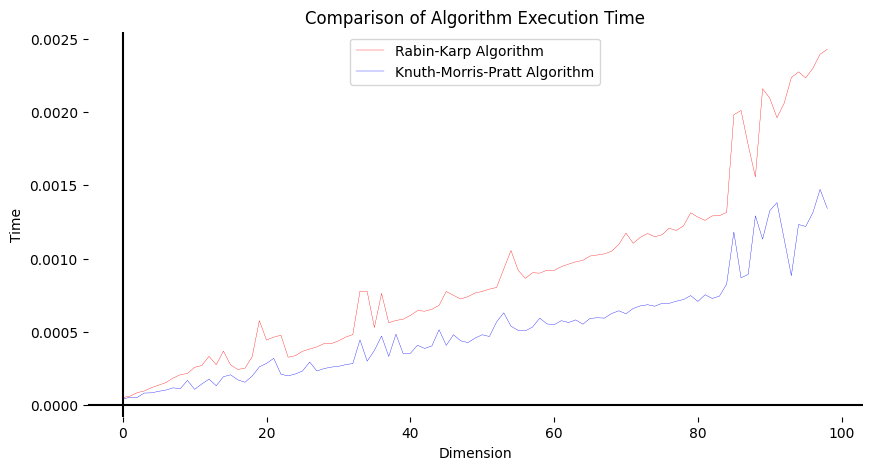

In [16]:
plot(df['rabinkarp_time'], df['kmp_time'], 'Comparison of Algorithm Execution Time', 'Time')

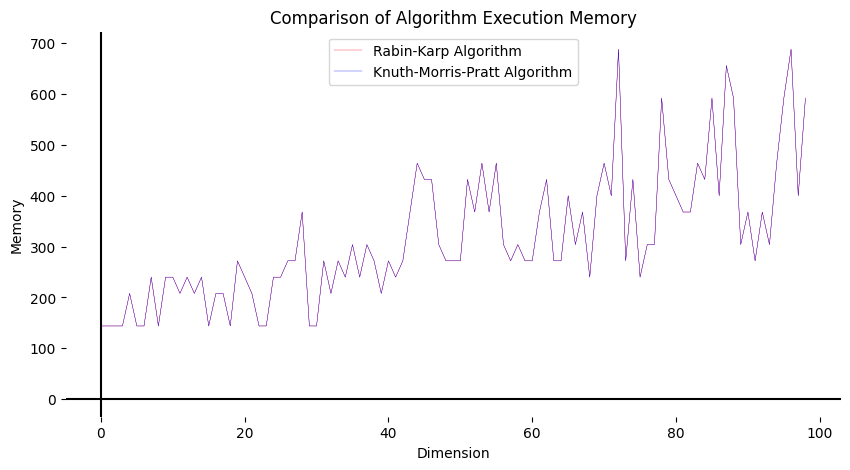

In [17]:
plot(df['rabinkarp_memory'], df['kmp_memory'], 'Comparison of Algorithm Execution Memory', 'Memory')

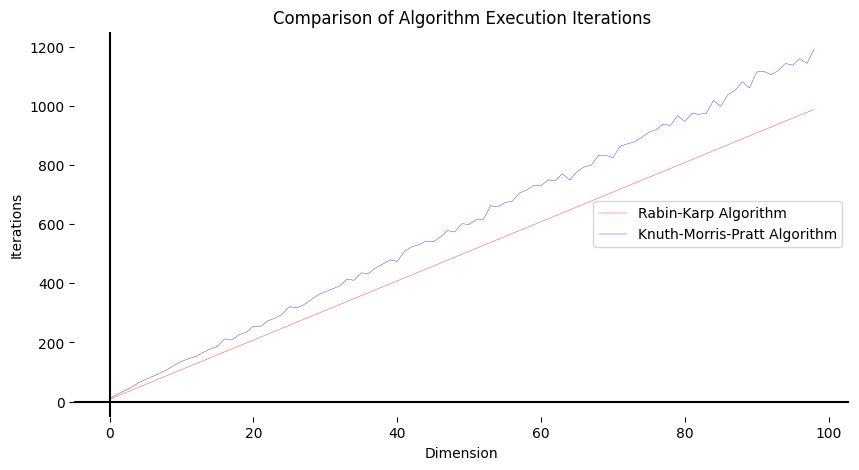

In [18]:
plot(df['rabinkarp_iterations'], df['kmp_iterations'], 'Comparison of Algorithm Execution Iterations', 'Iterations')